In [3]:
from blackhc import mdp

# Simple Game 1

In [3]:
spec = mdp.MDPSpec()
start = spec.state('start')
end = spec.state('end', terminal_state=True)
action_0 = spec.action()
action_1 = spec.action()

spec.transition(start, action_0, mdp.NextState(end))
spec.transition(start, action_1, mdp.NextState(end))
spec.transition(start, action_1, mdp.Reward(1))

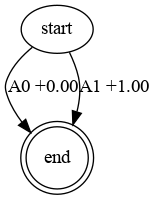

In [5]:
spec_graph = spec.to_graph()
spec_png = mdp.graph_to_png(spec_graph)

mdp.display_mdp(spec)

# Simple Game 2

In [4]:
spec = mdp.MDPSpec()
start = spec.state('start')
mid = spec.state('mid')
end = spec.state('end', terminal_state=True)
action_0 = spec.action()
action_1 = spec.action()

spec.transition(start, action_0, mdp.NextState(end))
spec.transition(start, action_1, mdp.NextState(end))
spec.transition(start, action_1, mdp.NextState(mid))
spec.transition(mid, action_1, mdp.NextState(end))
spec.transition(mid, action_0, mdp.NextState(end))
spec.transition(start, action_1, mdp.Reward(1))

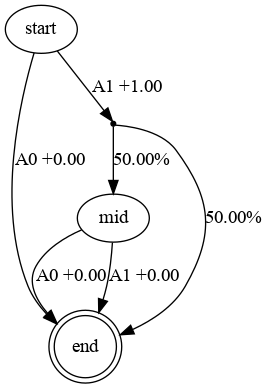

In [5]:
spec_graph = spec.to_graph()
spec_png = mdp.graph_to_png(spec_graph)

mdp.display_mdp(spec)

In [9]:
env = spec.to_env()

In [10]:
env.reset()

NotImplementedError: 

In [8]:
env.step(1)  # return (state, reward, done, info)

NotImplementedError: 

In [42]:
globals()['upper_midz'] =2

In [43]:
globals()['upper_midz']

2

In [88]:
def get_chain(horizon=1):
    spec = mdp.MDPSpec()
    start = spec.state('start')
    upper_start = spec.state('upper_start')
    lower_start = spec.state('lower_start')
    action_0 = spec.action()
    action_1 = spec.action()
    
    spec.transition(start, action_0, mdp.NextState(upper_start))
    spec.transition(start, action_1, mdp.NextState(lower_start))
    prev_upper = upper_start
    prev_lower = lower_start
    
    for i in range (horizon):
        globals()['upper_mid{}'.format(i)] = spec.state('upper_mid{}'.format(i))
        globals()['lower_mid{}'.format(i)] = spec.state('lower_mid{}'.format(i))
        
        if i > 0 and (i % 2 == 0):
            spec.transition(prev_upper, action_1, mdp.NextState(globals()['upper_mid{}'.format(i)]))
            spec.transition(prev_upper, action_0, mdp.NextState(globals()['lower_mid{}'.format(i)]))
            
        else:
            spec.transition(prev_upper, action_0, mdp.NextState(globals()['upper_mid{}'.format(i)]))
            spec.transition(prev_upper, action_1, mdp.NextState(globals()['lower_mid{}'.format(i)]))

        spec.transition(prev_lower, action_0, mdp.NextState(globals()['lower_mid{}'.format(i)]))
        spec.transition(prev_lower, action_1, mdp.NextState(globals()['lower_mid{}'.format(i)]))
    
        prev_upper = globals()['upper_mid{}'.format(i)]
        prev_lower = globals()['lower_mid{}'.format(i)]
        
        
    upper_end = spec.state('upper_end', terminal_state=True) 
    lower_end = spec.state('lower_end', terminal_state=True) 
    
    spec.transition(prev_upper, action_0, mdp.NextState(upper_end))
    spec.transition(prev_upper, action_1, mdp.NextState(lower_end))
    
    spec.transition(prev_lower, action_0, mdp.NextState(lower_end))
    spec.transition(prev_lower, action_1, mdp.NextState(lower_end))
    spec.transition(prev_upper, action_0, mdp.Reward(2))
    return spec

In [89]:
comchain = get_chain(3)

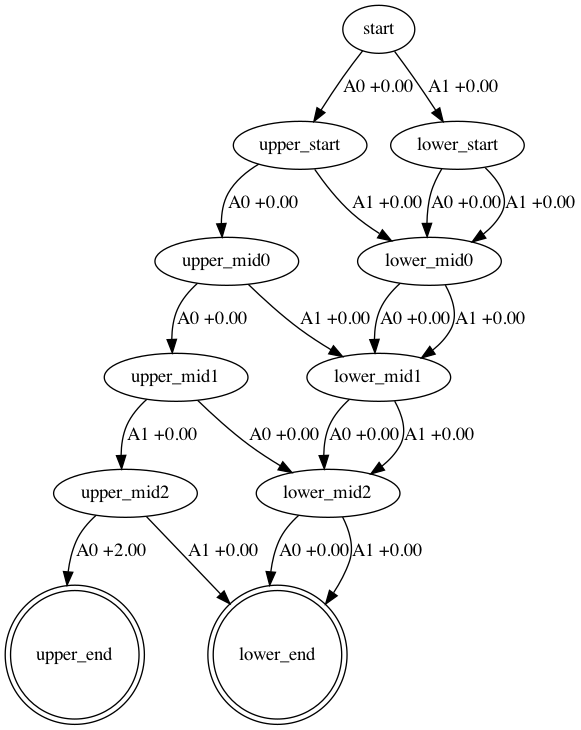

In [90]:
spec_graph = comchain.to_graph()
spec_png = mdp.graph_to_png(spec_graph)

mdp.display_mdp(comchain)

In [106]:
def sparse_reward(horizon=1):
    spec = mdp.MDPSpec()
    start = spec.state('start')
    upper_start = spec.state('upper_start')
    mid_start = spec.state('mid_start')
    lower_start = spec.state('lower_start')
    action_0 = spec.action()
    action_1 = spec.action()
    action_2 = spec.action()
    
    spec.transition(start, action_0, mdp.NextState(upper_start))
    spec.transition(start, action_1, mdp.NextState(mid_start))
    spec.transition(start, action_2, mdp.NextState(lower_start))
    prev_upper = upper_start
    prev_middle = mid_start
    prev_lower = lower_start
    
    for i in range (horizon):
        globals()['upper_mid{}'.format(i)] = spec.state('upper_mid{}'.format(i))
        globals()['mid_mid{}'.format(i)]   = spec.state('mid_mid{}'.format(i))
        globals()['lower_mid{}'.format(i)] = spec.state('lower_mid{}'.format(i))
        
        spec.transition(prev_upper, action_0, mdp.NextState(globals()['upper_mid{}'.format(i)]))
        spec.transition(prev_upper, action_1, mdp.NextState(globals()['mid_mid{}'.format(i)]))
        spec.transition(prev_upper, action_2, mdp.NextState(globals()['lower_mid{}'.format(i)]))
        spec.transition(prev_upper, action_1, mdp.Reward(1))
        spec.transition(prev_upper, action_2, mdp.Reward(1))

        spec.transition(prev_middle, action_0, mdp.NextState(globals()['mid_mid{}'.format(i)]))
        spec.transition(prev_middle, action_1, mdp.NextState(globals()['mid_mid{}'.format(i)]))
        spec.transition(prev_middle, action_2, mdp.NextState(globals()['mid_mid{}'.format(i)]))
        spec.transition(prev_middle, action_0, mdp.Reward(2))
        spec.transition(prev_middle, action_1, mdp.Reward(2))
        spec.transition(prev_middle, action_2, mdp.Reward(2))
        
        
        spec.transition(prev_lower, action_0, mdp.NextState(globals()['lower_mid{}'.format(i)]))
        spec.transition(prev_lower, action_1, mdp.NextState(globals()['lower_mid{}'.format(i)]))
        spec.transition(prev_lower, action_2, mdp.NextState(globals()['lower_mid{}'.format(i)]))
        spec.transition(prev_lower, action_0, mdp.Reward(2))
        spec.transition(prev_lower, action_1, mdp.Reward(2))
        spec.transition(prev_lower, action_2, mdp.Reward(2))
    
        prev_upper = globals()['upper_mid{}'.format(i)]
        prev_lower = globals()['lower_mid{}'.format(i)]
        prev_middle = globals()['mid_mid{}'.format(i)]
        
        
    upper_end = spec.state('upper_end', terminal_state=True) 
    mid_end = spec.state('mid_end', terminal_state=True)
    lower_end = spec.state('lower_end', terminal_state=True) 
    
    spec.transition(prev_upper, action_0, mdp.NextState(upper_end))
    spec.transition(prev_upper, action_1, mdp.NextState(upper_end))
    spec.transition(prev_upper, action_2, mdp.NextState(upper_end))
    spec.transition(prev_upper, action_0, mdp.Reward(500))
    spec.transition(prev_upper, action_1, mdp.Reward(500))
    spec.transition(prev_upper, action_2, mdp.Reward(500))
    
    spec.transition(prev_middle, action_0, mdp.NextState(mid_end))
    spec.transition(prev_middle, action_1, mdp.NextState(mid_end))
    spec.transition(prev_middle, action_2, mdp.NextState(mid_end))
    spec.transition(prev_middle, action_0, mdp.Reward(2))
    spec.transition(prev_middle, action_1, mdp.Reward(2))
    spec.transition(prev_middle, action_2, mdp.Reward(2))
    
    spec.transition(prev_lower, action_0, mdp.NextState(lower_end))
    spec.transition(prev_lower, action_1, mdp.NextState(lower_end))
    spec.transition(prev_lower, action_2, mdp.NextState(lower_end))
    spec.transition(prev_lower, action_0, mdp.Reward(2))
    spec.transition(prev_lower, action_1, mdp.Reward(2))
    spec.transition(prev_lower, action_2, mdp.Reward(2))

    return spec

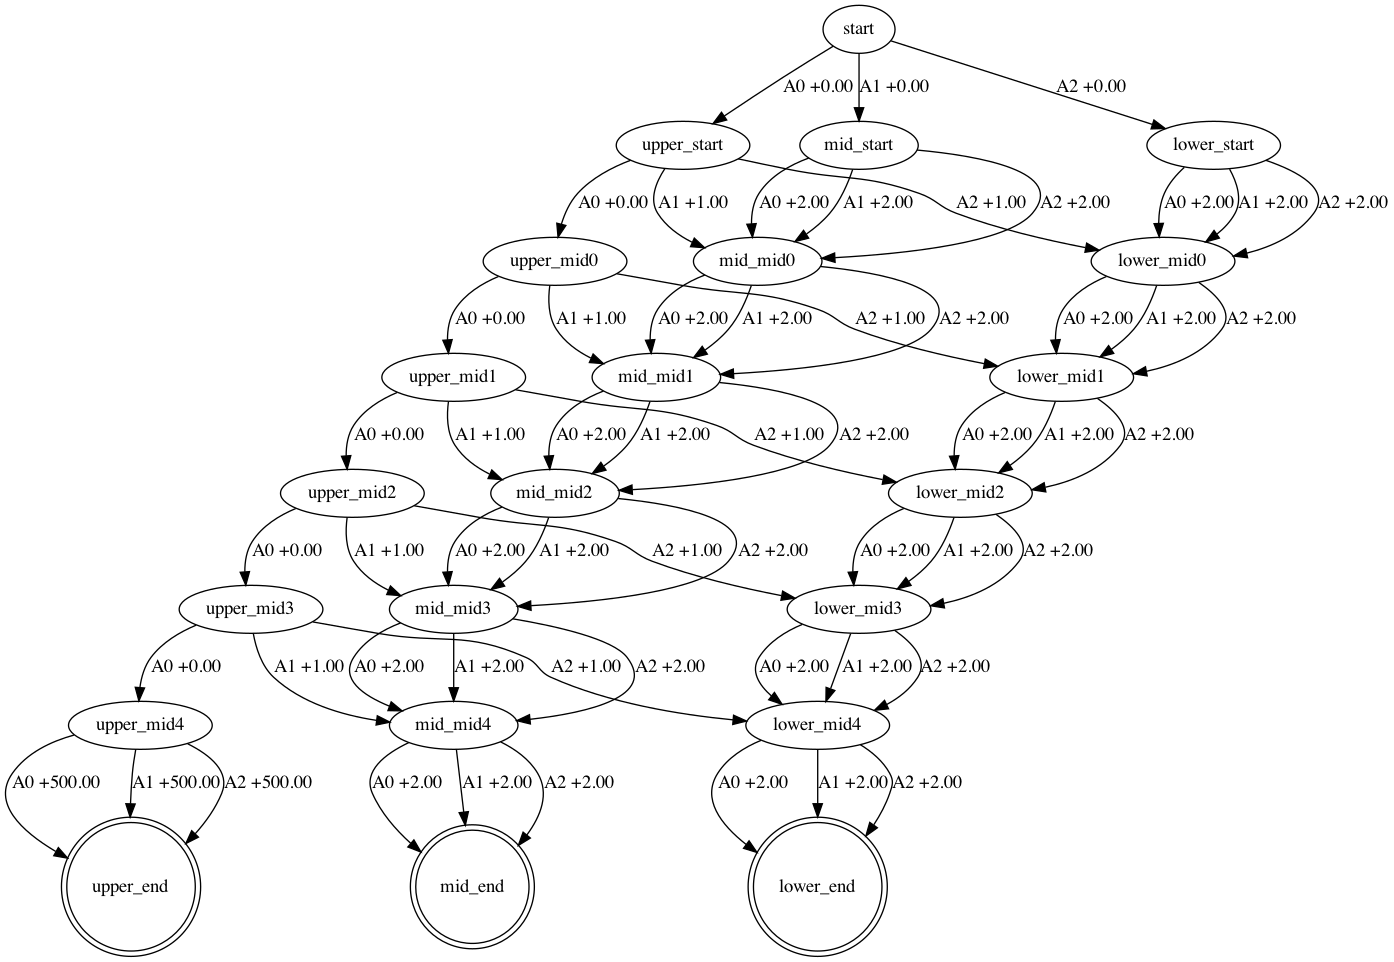

In [107]:
comchain = sparse_reward(5)
spec_graph = comchain.to_graph()
spec_png = mdp.graph_to_png(spec_graph)

mdp.display_mdp(comchain)

In [126]:
env = comchain.to_env()


In [127]:
dir(env)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_is_done',
 '_previous_action',
 '_previous_state',
 '_state',
 'action_space',
 'close',
 'mdp',
 'metadata',
 'observation_space',
 'render',
 'render_widget',
 'reset',
 'reward_range',
 'seed',
 'spec',
 'start_state',
 'step',
 'to_graph',
 'transitions',
 'unwrapped']

In [128]:
env.observation_space

Discrete(22)

In [130]:
env.reset()

0

In [132]:
! which python

/Users/dijiasu/miniconda3/bin/python


In [139]:
def sparse_reward(horizon=1):
    spec = mdp.MDPSpec()
    start = spec.state('start')
#     upper_start = spec.state('upper_start')
#     mid_start = spec.state('mid_start')
#     lower_start = spec.state('lower_start')
    action_0 = spec.action()
    action_1 = spec.action()
    action_2 = spec.action()
    
#     spec.transition(start, action_0, mdp.NextState(upper_start))
#     spec.transition(start, action_1, mdp.NextState(mid_start))
#     spec.transition(start, action_2, mdp.NextState(lower_start))
    prev_upper = start
    prev_middle = start
    prev_lower = start
    
    for i in range (horizon):
        globals()['upper_mid{}'.format(i)] = spec.state('upper_mid{}'.format(i))
        globals()['mid_mid{}'.format(i)]   = spec.state('mid_mid{}'.format(i))
        globals()['lower_mid{}'.format(i)] = spec.state('lower_mid{}'.format(i))
        
        
        spec.transition(prev_upper, action_0, mdp.NextState(globals()['upper_mid{}'.format(i)]))
        spec.transition(prev_upper, action_1, mdp.NextState(globals()['mid_mid{}'.format(i)]))
        spec.transition(prev_upper, action_2, mdp.NextState(globals()['lower_mid{}'.format(i)]))
        spec.transition(prev_upper, action_1, mdp.Reward(1))
        spec.transition(prev_upper, action_2, mdp.Reward(1))
        
        if i > 0:
            spec.transition(prev_middle, action_0, mdp.NextState(globals()['mid_mid{}'.format(i)]))
            spec.transition(prev_middle, action_1, mdp.NextState(globals()['mid_mid{}'.format(i)]))
            spec.transition(prev_middle, action_2, mdp.NextState(globals()['mid_mid{}'.format(i)]))
            spec.transition(prev_middle, action_0, mdp.Reward(2))
            spec.transition(prev_middle, action_1, mdp.Reward(2))
            spec.transition(prev_middle, action_2, mdp.Reward(2))


            spec.transition(prev_lower, action_0, mdp.NextState(globals()['lower_mid{}'.format(i)]))
            spec.transition(prev_lower, action_1, mdp.NextState(globals()['lower_mid{}'.format(i)]))
            spec.transition(prev_lower, action_2, mdp.NextState(globals()['lower_mid{}'.format(i)]))
            spec.transition(prev_lower, action_0, mdp.Reward(2))
            spec.transition(prev_lower, action_1, mdp.Reward(2))
            spec.transition(prev_lower, action_2, mdp.Reward(2))
    
        prev_upper = globals()['upper_mid{}'.format(i)]
        prev_lower = globals()['lower_mid{}'.format(i)]
        prev_middle = globals()['mid_mid{}'.format(i)]
        
        
    upper_end = spec.state('upper_end', terminal_state=True) 
    mid_end = spec.state('mid_end', terminal_state=True)
    lower_end = spec.state('lower_end', terminal_state=True) 
    
    spec.transition(prev_upper, action_0, mdp.NextState(upper_end))
    spec.transition(prev_upper, action_1, mdp.NextState(upper_end))
    spec.transition(prev_upper, action_2, mdp.NextState(upper_end))
    spec.transition(prev_upper, action_0, mdp.Reward(500))
    spec.transition(prev_upper, action_1, mdp.Reward(500))
    spec.transition(prev_upper, action_2, mdp.Reward(500))
    
    spec.transition(prev_middle, action_0, mdp.NextState(mid_end))
    spec.transition(prev_middle, action_1, mdp.NextState(mid_end))
    spec.transition(prev_middle, action_2, mdp.NextState(mid_end))
    spec.transition(prev_middle, action_0, mdp.Reward(2))
    spec.transition(prev_middle, action_1, mdp.Reward(2))
    spec.transition(prev_middle, action_2, mdp.Reward(2))
    
    spec.transition(prev_lower, action_0, mdp.NextState(lower_end))
    spec.transition(prev_lower, action_1, mdp.NextState(lower_end))
    spec.transition(prev_lower, action_2, mdp.NextState(lower_end))
    spec.transition(prev_lower, action_0, mdp.Reward(2))
    spec.transition(prev_lower, action_1, mdp.Reward(2))
    spec.transition(prev_lower, action_2, mdp.Reward(2))

    return spec

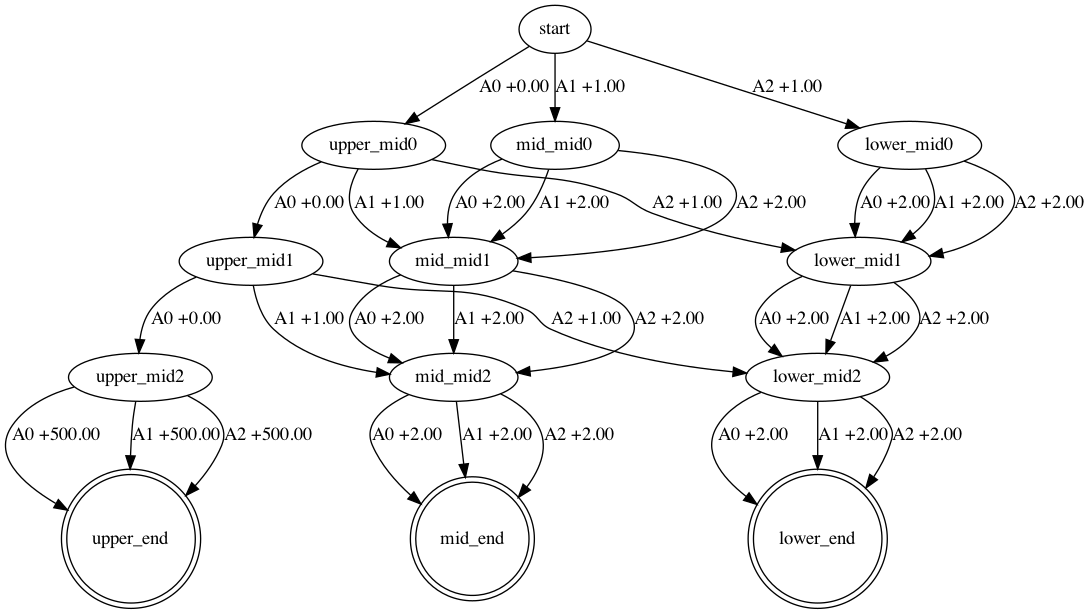

In [141]:
comchain = sparse_reward(3)
spec_graph = comchain.to_graph()
spec_png = mdp.graph_to_png(spec_graph)

mdp.display_mdp(comchain)

In [7]:
spec = mdp.MDPSpec()
start = spec.state('start')
end1 = spec.state('end1', terminal_state=True)
end2 = spec.state('end2', terminal_state=True)
end3 = spec.state('end3', terminal_state=True)
action_0 = spec.action()
action_1 = spec.action()
action_2 = spec.action()



spec.transition(start, action_0, mdp.NextState(end1))
spec.transition(start, action_1, mdp.NextState(end2))
spec.transition(start, action_2, mdp.NextState(end3))

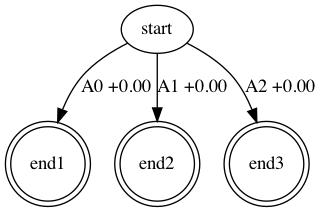

In [8]:
spec_graph = spec.to_graph()
spec_png = mdp.graph_to_png(spec_graph)

mdp.display_mdp(spec)